<a href="https://colab.research.google.com/github/AzamChatrAzar/cattegorical-dataset/blob/main/IRIS_BEST_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from seaborn import set_style
set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# بارگذاری دیتاست Iris
iris = load_iris()
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data["target"]=iris.target
data.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.cluster import KMeans

In [38]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# 1. بارگیری داده‌ها
iris = load_iris()
X, y = iris.data, iris.target

# 2. تقسیم داده
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2)

# 3. محاسبه k بهینه
n_train = len(X_train)
optimal_k = int(np.sqrt(n_train))

# تبدیل به عدد فرد نزدیک
optimal_k = optimal_k if optimal_k % 2 != 0 else optimal_k + 1

# 4. آموزش و ارزیابی مدل
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
print(f"دقت روی داده آموزش: {train_accuracy:.2%}")

print(f"تعداد داده‌های آموزش: {n_train}")


دقت روی داده آموزش: 97.50%
تعداد داده‌های آموزش: 120


sepal length (cm) کلاسترینگ بر اساس

In [39]:
# بارگذاری داده

X = iris.data[:, 0].reshape(-1, 1)  # فقط sepal length
y = iris.target


In [5]:
# اجرای K-Means
kmeans = KMeans(n_clusters=3)
predicted = kmeans.fit_predict(X)


In [16]:

# تطبیق برچسب‌ها
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

cm = confusion_matrix(y, predicted)
row_ind, col_ind = linear_sum_assignment(-cm)
label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
adjusted_pred = np.array([label_map[p] for p in predicted])


print(f"داده‌های اشتباه: {len(y) - (adjusted_pred == y).sum()} از {len(y)}")

داده‌های اشتباه: 6 از 150


sepal width (cm)کلاسترینگ با

In [17]:
X = iris.data[:, 1].reshape(-1, 1)  # فقط sepal width

kmeans = KMeans(n_clusters=3)
predicted = kmeans.fit_predict(X)

cm = confusion_matrix(y, predicted)
row_ind, col_ind = linear_sum_assignment(-cm)
label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
adjusted_pred = np.array([label_map[p] for p in predicted])


print(f"داده‌های اشتباه: {len(y) - (adjusted_pred == y).sum()} از {len(y)}")

داده‌های اشتباه: 65 از 150


petal length (cm) کلاسترینگ با

In [18]:
X = iris.data[:, 2].reshape(-1, 1)  # فقط petal length

kmeans = KMeans(n_clusters=3)
predicted = kmeans.fit_predict(X)

cm = confusion_matrix(y, predicted)
row_ind, col_ind = linear_sum_assignment(-cm)
label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
adjusted_pred = np.array([label_map[p] for p in predicted])


print(f"داده‌های اشتباه: {len(y) - (adjusted_pred == y).sum()} از {len(y)}")

داده‌های اشتباه: 16 از 150


petal width (cm)کلاسترینگ با

In [19]:
X = iris.data[:, 3].reshape(-1, 1)  # فقط petal width

kmeans = KMeans(n_clusters=3)
predicted = kmeans.fit_predict(X)

cm = confusion_matrix(y, predicted)
row_ind, col_ind = linear_sum_assignment(-cm)
label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
adjusted_pred = np.array([label_map[p] for p in predicted])


print(f"داده‌های اشتباه: {len(y) - (adjusted_pred == y).sum()} از {len(y)}")

داده‌های اشتباه: 6 از 150


In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# بارگیری داده‌های iris
iris = load_iris()
X = iris.data
y = iris.target


In [23]:

# لیست برای ذخیره ماسک‌های اشتباه
wrong_masks = []

# بررسی هر ویژگی به صورت جداگانه
for i in range(4):
    X_feature = X[:, i].reshape(-1, 1)  # انتخاب ویژگی i-ام

    # خوشه‌بندی با K-Means
    kmeans = KMeans(n_clusters=3)
    predicted = kmeans.fit_predict(X_feature)

    # تطبیق برچسب‌ها
    cm = confusion_matrix(y, predicted)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
    adjusted_pred = np.array([label_map[p] for p in predicted])

    # ذخیره ماسک داده‌های اشتباه
    wrong_mask = (adjusted_pred != y)
    wrong_masks.append(wrong_mask)
    print(f"ویژگی {iris.feature_names[i]}: {wrong_mask.sum()} داده اشتباه")

# محاسبه اشتراک ماسک‌های اشتباه
common_wrong_mask = np.all(wrong_masks, axis=0)

# نمایش داده‌های اشتباه مشترک
print(f"\nتعداد داده‌های اشتباه مشترک در تمام ویژگی‌ها: {common_wrong_mask.sum()}")
print("اندیس داده‌های اشتباه مشترک:", np.where(common_wrong_mask)[0])

ویژگی sepal length (cm): 42 داده اشتباه
ویژگی sepal width (cm): 66 داده اشتباه
ویژگی petal length (cm): 7 داده اشتباه
ویژگی petal width (cm): 6 داده اشتباه

تعداد داده‌های اشتباه مشترک در تمام ویژگی‌ها: 1
اندیس داده‌های اشتباه مشترک: [106]


In [41]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# بارگیری داده‌های iris
iris = load_iris()
X = iris.data
y = iris.target

In [30]:


# لیست برای ذخیره ماسک‌های اشتباه و ویژگی‌های قابل قبول
wrong_masks = []
selected_features = []

# بررسی هر ویژگی به صورت جداگانه
for i in range(4):
    X_feature = X[:, i].reshape(-1, 1)  # انتخاب ویژگی i-ام

    # خوشه‌بندی با K-Means
    kmeans = KMeans(n_clusters=3)
    predicted = kmeans.fit_predict(X_feature)

    # تطبیق برچسب‌ها
    cm = confusion_matrix(y, predicted)
    row_ind, col_ind = linear_sum_assignment(-cm)
    label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
    adjusted_pred = np.array([label_map[p] for p in predicted])

    # محاسبه دقت و درصد خطا
    accuracy = (adjusted_pred == y).mean()
    error_percentage = 1 - accuracy

    print(f"ویژگی {iris.feature_names[i]}:")
    print(f"  - درصد خطا: {error_percentage:.2%}")
    print(f"  - تعداد داده‌های اشتباه: {(adjusted_pred != y).sum()}")

    # اگر درصد خطا کمتر از ۱۰٪ بود، ویژگی را انتخاب کن
    if error_percentage < 0.10:
        selected_features.append(i)
        wrong_masks.append(adjusted_pred != y)

# اگر هیچ ویژگی‌ای انتخاب نشد، حداقل یک ویژگی با کمترین خطا را انتخاب کن
if not selected_features:
    print("\nهیچ ویژگی‌ای خطای کمتر از ۱۰٪ نداشت! ویژگی با کمترین خطا انتخاب می‌شود.")
    error_percentages = []
    for i in range(4):
        X_feature = X[:, i].reshape(-1, 1)
        kmeans = KMeans(n_clusters=3)
        predicted = kmeans.fit_predict(X_feature)
        cm = confusion_matrix(y, predicted)
        row_ind, col_ind = linear_sum_assignment(-cm)
        label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
        adjusted_pred = np.array([label_map[p] for p in predicted])
        error_percentages.append(1 - (adjusted_pred == y).mean())

    best_feature = np.argmin(error_percentages)
    selected_features.append(best_feature)
    print(f"ویژگی انتخاب شده: {iris.feature_names[best_feature]} با خطای {error_percentages[best_feature]:.2%}")

# محاسبه داده‌های اشتباه مشترک در ویژگی‌های انتخاب شده
if len(selected_features) > 1:
    common_wrong_mask = np.any(wrong_masks, axis=0)  # اگر در حداقل یک ویژگی اشتباه بود
else:
    common_wrong_mask = wrong_masks[0]

# حذف داده‌های اشتباه مشترک
X_filtered = X[~common_wrong_mask]
y_filtered = y[~common_wrong_mask]

print(f"\nویژگی‌های انتخاب شده (خطا < ۱۰٪): {[iris.feature_names[i] for i in selected_features]}")
print(f"تعداد داده‌های اشتباه در ویژگی‌های انتخابی: {common_wrong_mask.sum()}")
print(f"تعداد داده‌های باقی‌مانده پس از حذف: {len(X_filtered)}")

# انتخاب فقط ویژگی‌های با خطای کم
X_filtered_selected = X_filtered[:, selected_features]

# تقسیم داده به آموزش و آزمون
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered_selected, y_filtered, test_size=0.2)

# آموزش KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# محاسبه دقت
accuracy = knn.score(X_test, y_test)
print(f"\nدقت نهایی با KNN روی داده‌های پاک‌سازی شده: {accuracy:.2%}")

ویژگی sepal length (cm):
  - درصد خطا: 28.00%
  - تعداد داده‌های اشتباه: 42
ویژگی sepal width (cm):
  - درصد خطا: 48.67%
  - تعداد داده‌های اشتباه: 73
ویژگی petal length (cm):
  - درصد خطا: 4.67%
  - تعداد داده‌های اشتباه: 7
ویژگی petal width (cm):
  - درصد خطا: 4.00%
  - تعداد داده‌های اشتباه: 6

ویژگی‌های انتخاب شده (خطا < ۱۰٪): ['petal length (cm)', 'petal width (cm)']
تعداد داده‌های اشتباه در ویژگی‌های انتخابی: 12
تعداد داده‌های باقی‌مانده پس از حذف: 138

دقت نهایی با KNN روی داده‌های پاک‌سازی شده: 100.00%


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# بارگیری داده‌های iris
iris = load_iris()
X = iris.data
y = iris.target



در حال پردازش برای test_size = 0.13
ویژگی‌های انتخاب شده: ['petal length (cm)', 'petal width (cm)']
تعداد داده‌های آموزش پس از فیلتر: 119
دقت نهایی: 95.00%

در حال پردازش برای test_size = 0.15
ویژگی‌های انتخاب شده: ['petal length (cm)', 'petal width (cm)']
تعداد داده‌های آموزش پس از فیلتر: 117
دقت نهایی: 100.00%

در حال پردازش برای test_size = 0.17
ویژگی‌های انتخاب شده: ['petal length (cm)', 'petal width (cm)']
تعداد داده‌های آموزش پس از فیلتر: 116
دقت نهایی: 96.15%

در حال پردازش برای test_size = 0.19
ویژگی‌های انتخاب شده: ['petal length (cm)', 'petal width (cm)']
تعداد داده‌های آموزش پس از فیلتر: 112
دقت نهایی: 93.10%


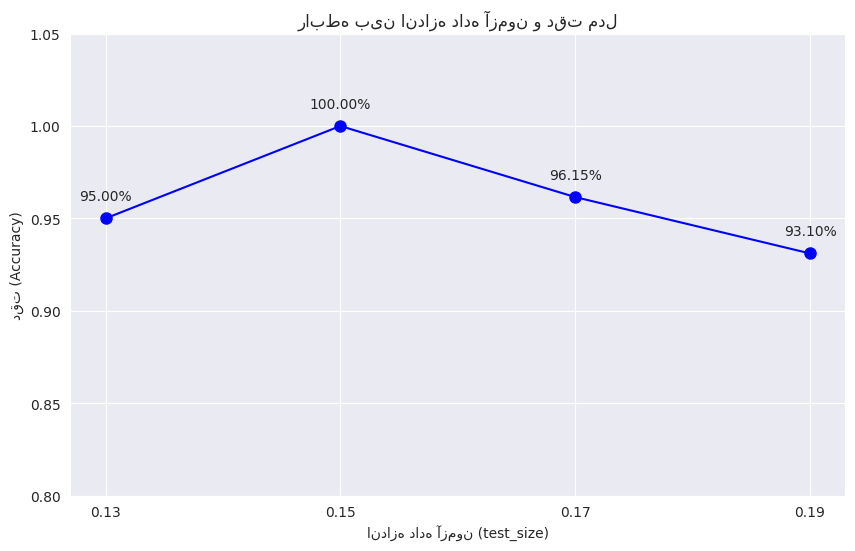

In [34]:

# لیست برای ذخیره نتایج
test_sizes = [0.13, 0.15, 0.17, 0.19]
accuracies = []

for test_size in test_sizes:
    print(f"\n{'='*50}")
    print(f"در حال پردازش برای test_size = {test_size}")
    print(f"{'='*50}")

    # تقسیم اولیه داده
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size)

    # لیست برای ذخیره ماسک‌های اشتباه و ویژگی‌های قابل قبول
    wrong_masks = []
    selected_features = []

    # بررسی هر ویژگی به صورت جداگانه
    for i in range(4):
        X_feature = X_temp[:, i].reshape(-1, 1)

        # خوشه‌بندی با K-Means
        kmeans = KMeans(n_clusters=3)
        predicted = kmeans.fit_predict(X_feature)

        # تطبیق برچسب‌ها
        cm = confusion_matrix(y_temp, predicted)
        row_ind, col_ind = linear_sum_assignment(-cm)
        label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
        adjusted_pred = np.array([label_map[p] for p in predicted])

        # محاسبه دقت و درصد خطا
        error_percentage = 1 - (adjusted_pred == y_temp).mean()

        # اگر درصد خطا کمتر از ۱۰٪ بود، ویژگی را انتخاب کن
        if error_percentage < 0.10:
            selected_features.append(i)
            wrong_masks.append(adjusted_pred != y_temp)

    # اگر هیچ ویژگی‌ای انتخاب نشد، حداقل یک ویژگی با کمترین خطا را انتخاب کن
    if not selected_features:
        error_percentages = []
        for i in range(4):
            X_feature = X_temp[:, i].reshape(-1, 1)
            kmeans = KMeans(n_clusters=3)
            predicted = kmeans.fit_predict(X_feature)
            cm = confusion_matrix(y_temp, predicted)
            row_ind, col_ind = linear_sum_assignment(-cm)
            label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
            adjusted_pred = np.array([label_map[p] for p in predicted])
            error_percentages.append(1 - (adjusted_pred == y_temp).mean())

        best_feature = np.argmin(error_percentages)
        selected_features.append(best_feature)

    # محاسبه داده‌های اشتباه مشترک
    if len(selected_features) > 1:
        common_wrong_mask = np.any(wrong_masks, axis=0)
    else:
        common_wrong_mask = wrong_masks[0]

    # حذف داده‌های اشتباه مشترک
    X_filtered = X_temp[~common_wrong_mask]
    y_filtered = y_temp[~common_wrong_mask]

    # انتخاب ویژگی‌های با خطای کم
    X_filtered_selected = X_filtered[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # آموزش KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_filtered_selected, y_filtered)

    # محاسبه دقت
    accuracy = knn.score(X_test_selected, y_test)
    accuracies.append(accuracy)

    print(f"ویژگی‌های انتخاب شده: {[iris.feature_names[i] for i in selected_features]}")
    print(f"تعداد داده‌های آموزش پس از فیلتر: {len(X_filtered)}")
    print(f"دقت نهایی: {accuracy:.2%}")

# رسم نمودار
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, 'bo-', markersize=8)
plt.xlabel('اندازه داده آزمون (test_size)')
plt.ylabel('دقت (Accuracy)')
plt.title('رابطه بین اندازه داده آزمون و دقت مدل')
plt.grid(True)
plt.xticks(test_sizes)
plt.ylim(0.8, 1.05)
for i, txt in enumerate(accuracies):
    plt.annotate(f"{txt:.2%}", (test_sizes[i], accuracies[i]+0.01), ha='center')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

# بارگیری داده‌ها
iris = load_iris()
X, y = iris.data, iris.target


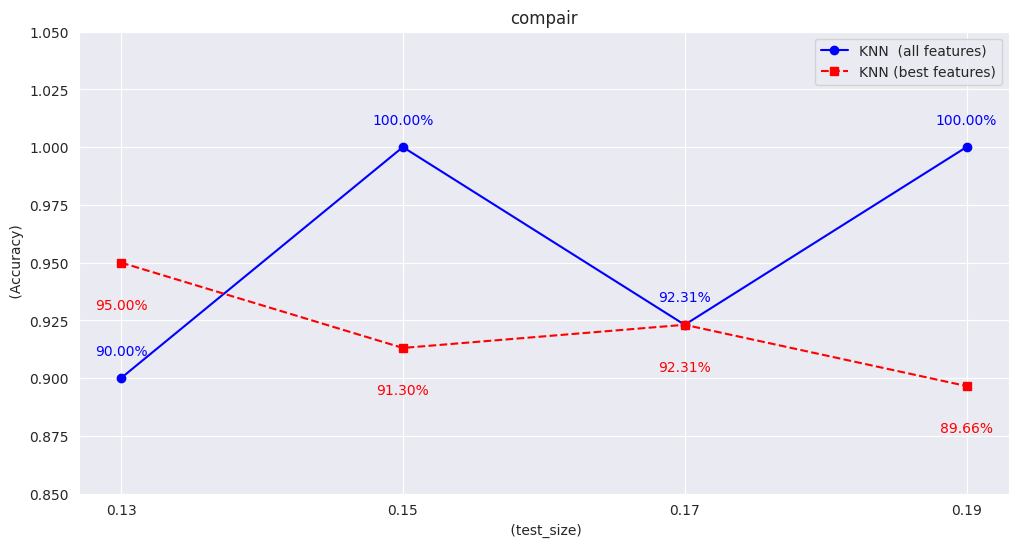

In [42]:

# تنظیمات تست سایزها
test_sizes = [0.13, 0.15, 0.17, 0.19]
accuracies_knn = []  # برای ذخیره دقت‌های روش KNN ساده
accuracies_filtered = []  # برای ذخیره دقت‌های روش فیلتر شده

plt.figure(figsize=(12, 6))

# روش اول: KNN ساده
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # محاسبه k بهینه
    n_train = len(X_train)
    optimal_k = int(np.sqrt(n_train)) | 1  # تضمین فرد بودن

    # آموزش مدل
    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train, y_train)
    accuracies_knn.append(knn.score(X_test, y_test))

# روش دوم: روش فیلتر شده
for test_size in test_sizes:
    # تقسیم داده
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size)

    # بخش فیلتر کردن داده‌ها (همان کد قبلی)
    wrong_masks = []
    selected_features = []

    for i in range(4):
        X_feature = X_temp[:, i].reshape(-1, 1)
        kmeans = KMeans(n_clusters=3)
        predicted = kmeans.fit_predict(X_feature)
        cm = confusion_matrix(y_temp, predicted)
        row_ind, col_ind = linear_sum_assignment(-cm)
        label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
        adjusted_pred = np.array([label_map[p] for p in predicted])
        error_percentage = 1 - (adjusted_pred == y_temp).mean()

        if error_percentage < 0.10:
            selected_features.append(i)
            wrong_masks.append(adjusted_pred != y_temp)

    if not selected_features:
        error_percentages = []
        for i in range(4):
            X_feature = X_temp[:, i].reshape(-1, 1)
            kmeans = KMeans(n_clusters=3)
            predicted = kmeans.fit_predict(X_feature)
            cm = confusion_matrix(y_temp, predicted)
            row_ind, col_ind = linear_sum_assignment(-cm)
            label_map = {pred: true for true, pred in zip(row_ind, col_ind)}
            adjusted_pred = np.array([label_map[p] for p in predicted])
            error_percentages.append(1 - (adjusted_pred == y_temp).mean())
        best_feature = np.argmin(error_percentages)
        selected_features.append(best_feature)

    common_wrong_mask = np.any(wrong_masks, axis=0) if len(selected_features) > 1 else wrong_masks[0]
    X_filtered = X_temp[~common_wrong_mask]
    y_filtered = y_temp[~common_wrong_mask]
    X_filtered_selected = X_filtered[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # آموزش KNN روی داده‌های فیلتر شده
    optimal_k = int(np.sqrt(len(X_filtered))) | 1
    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_filtered_selected, y_filtered)
    accuracies_filtered.append(knn.score(X_test_selected, y_test))

# رسم نمودارها
plt.plot(test_sizes, accuracies_knn, 'bo-', label='KNN  (all features)')
plt.plot(test_sizes, accuracies_filtered, 'rs--', label='KNN (best features)')

# تنظیمات نمودار
plt.xlabel(' (test_size)')
plt.ylabel(' (Accuracy)')
plt.title("compair")
plt.xticks(test_sizes)
plt.ylim(0.85, 1.05)
plt.grid(True)
plt.legend()

# نمایش مقادیر روی نمودار
for i, (acc_knn, acc_filt) in enumerate(zip(accuracies_knn, accuracies_filtered)):
    plt.annotate(f"{acc_knn:.2%}", (test_sizes[i], acc_knn+0.01), ha='center', color='blue')
    plt.annotate(f"{acc_filt:.2%}", (test_sizes[i], acc_filt-0.02), ha='center', color='red')

plt.show()